In [5]:
import networkx as nx
import numpy as np
import random
random.seed;
import matplotlib.pyplot as plt
import scipy
from scipy import sparse
from scipy.sparse import linalg
import time
import math
from scipy import stats
from sklearn.cluster import KMeans
from mpl_toolkits.mplot3d import Axes3D
from random import shuffle

import sys
sys.path += ['/Package'] ### Specify the directory where the Package is
from clustering_more import *

import warnings
warnings.filterwarnings("ignore")

## Load the datasets

#### Labelled datasets

In [6]:
fb = np.loadtxt('datasets/facebook_combined.txt')
facebook = simmetrize(fb)

mail = np.loadtxt('datasets/email.txt')
mail = mail[:,:2]

power = nx.read_gml('datasets/power.gml', label = 'id')
A_power = np.array(nx.adjacency_matrix(power).todense())
pb = edge_list(A_power)
power = pb

nutella = np.loadtxt('datasets/p2p-Gnutella08.txt')
nut = np.zeros((2*len(nutella),2))
nut[:len(nutella)] = nutella
nut[len(nutella):][:,0] = nutella[:,1]
nut[len(nutella):][:,1] = nutella[:,0]
nutella = nut

wikipedia = np.loadtxt('datasets/Wiki-Vote.txt')
wiki = np.zeros((2*len(wikipedia),2))
wiki[:len(wikipedia)] = wikipedia
wiki[len(wikipedia):][:,0] = wikipedia[:,1]
wiki[len(wikipedia):][:,1] = wikipedia[:,0]
wikipedia = wiki

#### Create the adjacency matrix

In [10]:
M = mail
# M = facebook
# M = power
# M = nutella
# M = wikipedia 



k1,k2,k3=np.unique(M,return_inverse=True,return_index=True)
rows,cols=k3.reshape(M.shape).T
A = sparse.coo_matrix((np.ones(rows.shape,int),(rows,cols)))
A = scipy.sparse.csr_matrix(A)
A = scipy.sparse.csr_matrix.sign(A)
A = A.astype(float)

n = 1133


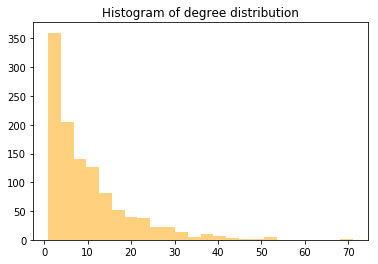

In [11]:
n = len(A.A)
print('n = ' + str(n))
plt.figure()
d = np.sum(A.A, axis = 0)
plt.hist(d,bins = 3*int(n**0.3), color = 'orange', alpha = 0.5)
plt.title('Histogram of degree distribution')
plt.show()

### Test different methods

#### Our method

In [12]:
n_cycles = 12
max_n_classes = 70
percentage = 'yes'

n_classes = 'none'

classes, X, n_clusters, r_estimate  = BH(A, n_cycles,max_n_classes, n_classes, percentage)
mod = modularity(A.A, classes)
print('\nModularity: ' + str(mod))
print('\nNumber of classes:' + str(n_clusters))

Completion : 100.0%
Modularity: 0.49427029941880135

Number of classes:21


#### Saade

In [13]:
classes_s, X_s = saade(A, n_clusters)
mod = modularity(A.A, classes_s)
print('\nModularity: ' + str(mod))


Modularity: 0.39907284777382784


#### Adjacency

In [14]:
classes_a,X_a = adjacency(A,n_clusters)
mod = modularity(A.A, classes_a)
print('\nModularity: ' + str(mod))


Modularity: 0.32542560589604197
